#Project - Data Processing<img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/04/Utoronto_coa.svg/1024px-Utoronto_coa.svg.png" width=60px align="right"> 
###APS360 - Applied Fundamentals of Machine Learning

---
**Members**
- Javiera Bao
- Kieran Kasha
- Rishik Kumar
- Abhay Verma

##0. Imports

In [ ]:
from google.colab import drive
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import yaml

##1. Data visualization

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_data = '/content/drive/MyDrive/aps360/stems/Allegria_MendelssohnMovement1_STEM_01.wav'

## x = librosa.load(audio_data, sr=None)
x = librosa.load(audio_data)
print(x)

(array([-3.5546655e-06, -1.9180359e-05, -3.4012275e-05, ...,
       -7.2367795e-05, -8.2596322e-05,  0.0000000e+00], dtype=float32), 22050)


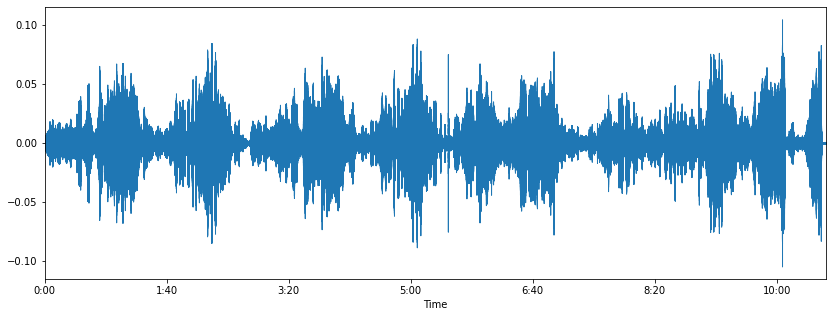

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[0])

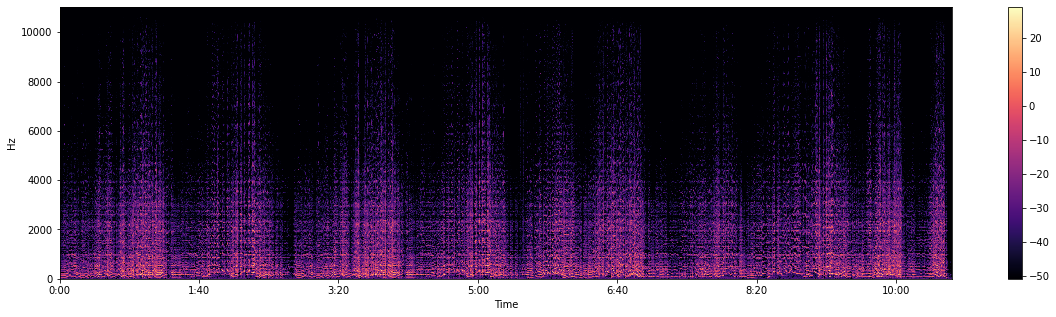

In [ ]:
X = librosa.stft(x[0])
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, x_axis='time', y_axis='hz')
plt.colorbar()

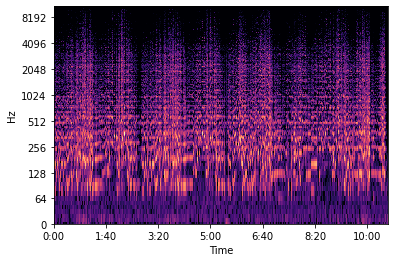

In [ ]:
librosa.display.specshow(Xdb, x_axis='time', y_axis='log')

##2. Pre-processing

In [ ]:
iter = 1
durations_kieran = dict()
try:
    for filename in os.listdir(f'./drive/My Drive/aps360/kieran_stems'):
        songname = f'./drive/My Drive/aps360/kieran_stems/{filename}'
        y, sr = librosa.load(songname, mono=True)
        duration = librosa.get_duration(y=y, sr=sr)
        durations_kieran[filename[:-4]] = duration
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='plasma', sides='default', mode='default', scale='dB')
        plt.axis('off')
        plt.savefig(f'./drive/My Drive/aps360/kieran_spectrograms/{filename[:-4]}.png')
        plt.clf()
        print('Audio {} done'.format(iter))
        iter += 1
except IsADirectoryError:
    pass

Audio 1 done


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Audio 2 done


<Figure size 432x288 with 0 Axes>

In [ ]:
iter = 1
durations = dict()
try:
    for filename in os.listdir(f'./drive/My Drive/aps360/stems'):
        songname = f'./drive/My Drive/aps360/stems/{filename}'
        y, sr = librosa.load(songname, mono=True)
        duration = librosa.get_duration(y=y, sr=sr)
        durations[filename[:-4]] = duration
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='plasma', sides='default', mode='default', scale='dB')
        plt.axis('off')
        plt.savefig(f'./drive/My Drive/aps360/spectrograms2/{filename[:-4]}.png')
        plt.clf()
        print('Audio {} done'.format(iter))
        iter += 1
except IsADirectoryError:
    pass

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Audio 1 done
Audio 2 done
Audio 3 done
Audio 4 done
Audio 5 done
Audio 6 done
Audio 7 done
Audio 8 done
Audio 9 done
Audio 10 done
Audio 11 done
Audio 12 done
Audio 13 done
Audio 14 done
Audio 15 done
Audio 16 done
Audio 17 done
Audio 18 done
Audio 19 done
Audio 20 done
Audio 21 done
Audio 22 done
Audio 23 done
Audio 24 done
Audio 25 done
Audio 26 done
Audio 27 done
Audio 28 done
Audio 29 done
Audio 30 done
Audio 31 done
Audio 32 done
Audio 33 done
Audio 34 done
Audio 35 done
Audio 36 done
Audio 37 done
Audio 38 done
Audio 39 done
Audio 40 done
Audio 41 done
Audio 42 done
Audio 43 done
Audio 44 done
Audio 45 done
Audio 46 done
Audio 47 done
Audio 48 done
Audio 49 done
Audio 50 done
Audio 51 done
Audio 52 done
Audio 53 done
Audio 54 done
Audio 55 done
Audio 56 done
Audio 57 done
Audio 58 done
Audio 59 done
Audio 60 done
Audio 61 done
Audio 62 done
Audio 63 done
Audio 64 done
Audio 65 done
Audio 66 done
Audio 67 done
Audio 68 done
Audio 69 done
Audio 70 done
Audio 71 done
Audio 72 done
A

<Figure size 432x288 with 0 Axes>

##3. Data analysis

In [ ]:
df = pd.DataFrame(columns=('song_name', 'stem_name', 'genre', 'instrument', 'duration'))

for filename in os.listdir(f'./drive/My Drive/aps360/yaml'):
      yaml_name = f'./drive/My Drive/aps360/yaml/{filename}'
      with open(yaml_name, 'r') as stream:
        try:
            yaml_file = yaml.safe_load(stream)
            for stem in yaml_file['stems']:
                df.loc[len(df)] = 0
                df.loc[len(df)-1, 'song_name'] = filename[:-14]
                stem_name = yaml_file['stems'][stem]['filename'][:-4]
                df.loc[len(df)-1, 'stem_name'] = stem_name
                genre = yaml_file['genre']
                df.loc[len(df)-1, 'genre'] = genre
                instrument = yaml_file['stems'][stem]['instrument']
                df.loc[len(df)-1, 'instrument'] = instrument
                df.loc[len(df)-1, 'duration'] = durations[stem_name]
        except yaml.YAMLError as exc:
            print(exc)

df

,song_name,stem_name,genre,instrument,duration
0,Cayetana_MissThing,Cayetana_MissThing_STEM_01,Rock,drum set,237.029
1,Cayetana_MissThing,Cayetana_MissThing_STEM_02,Rock,distorted electric guitar,237.029
2,Cayetana_MissThing,Cayetana_MissThing_STEM_03,Rock,distorted electric guitar,237.029
3,Cayetana_MissThing,Cayetana_MissThing_STEM_04,Rock,electric bass,237.029
4,Cayetana_MissThing,Cayetana_MissThing_STEM_05,Rock,female singer,237.029
...,...,...,...,...,...
1279,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_04,Pop,violin,227.643
1280,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_05,Pop,piano,227.643
1281,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_06,Pop,clean electric guitar,227.643
1282,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_07,Pop,drum set,227.643


In [ ]:
df.to_csv(index=False)

'song_name,stem_name,genre,instrument,duration\nCayetana_MissThing,Cayetana_MissThing_STEM_01,Rock,drum set,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_02,Rock,distorted electric guitar,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_03,Rock,distorted electric guitar,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_04,Rock,electric bass,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_05,Rock,female singer,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_06,Rock,distorted electric guitar,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_07,Rock,female singer,237.0292970521542\nDebussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_01,Classical,male singer,223.52689342403627\nDebussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_02,Classical,piano,223.52689342403627\nMusicDelta_LatinJazz,MusicDelta_LatinJazz_STEM_01,Jazz,electric bass,66.96580498866213\nMusicDelta_LatinJazz,MusicDelta_LatinJazz_STEM_02,Jazz,

In [ ]:
df = pd.read_csv('./drive/My Drive/aps360/group59db.csv')

In [ ]:
df

,song_name,stem_name,genre,instrument,duration
0,Cayetana_MissThing,Cayetana_MissThing_STEM_01,Rock,drum set,237.029297
1,Cayetana_MissThing,Cayetana_MissThing_STEM_02,Rock,distorted electric guitar,237.029297
2,Cayetana_MissThing,Cayetana_MissThing_STEM_03,Rock,distorted electric guitar,237.029297
3,Cayetana_MissThing,Cayetana_MissThing_STEM_04,Rock,electric bass,237.029297
4,Cayetana_MissThing,Cayetana_MissThing_STEM_05,Rock,female singer,237.029297
...,...,...,...,...,...
1279,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_04,Pop,violin,227.643175
1280,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_05,Pop,piano,227.643175
1281,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_06,Pop,clean electric guitar,227.643175
1282,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_07,Pop,drum set,227.643175


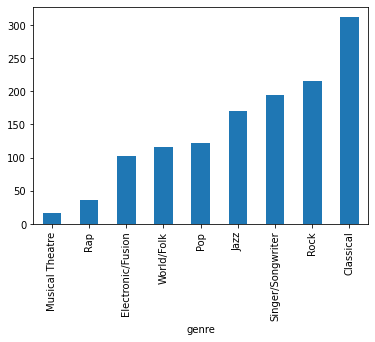

In [ ]:
df.groupby('genre').size().sort_values().plot.bar()

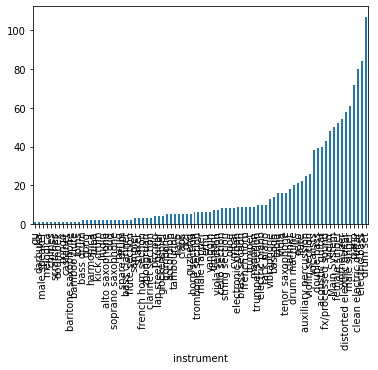

In [ ]:
df.groupby('instrument').size().sort_values().plot.bar()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

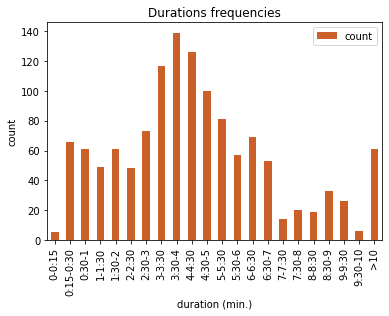

In [ ]:
bins = [-1, 15, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, np.inf]
labels=['0-0:15', '0:15-0:30', '0:30-1', '1-1:30', '1:30-2', '2-2:30', '2:30-3', '3-3:30', '3:30-4', '4-4:30', '4:30-5', '5-5:30', '5:30-6', '6-6:30', '6:30-7', '7-7:30', '7:30-8', '8-8:30', '8:30-9', '9-9:30', '9:30-10', '>10']

duration_df = df.groupby(pd.cut(df['duration'], bins=bins, labels=labels)).size().reset_index(name='count')

duration_plot = duration_df.plot(kind='bar', colormap='jet', title='Durations frequencies', color='#ca5f29ff')

duration_plot.set_xticklabels([c for c in duration_df.duration])
duration_plot.set_xlabel("duration (min.)")
duration_plot.set_ylabel("count")

In [ ]:
df_0_to_7 = df.loc[(df['duration'] >= 15) & (df['duration'] <= 420)]
df_0_to_7

,song_name,stem_name,genre,instrument,duration
0,Cayetana_MissThing,Cayetana_MissThing_STEM_01,Rock,drum set,237.029297
1,Cayetana_MissThing,Cayetana_MissThing_STEM_02,Rock,distorted electric guitar,237.029297
2,Cayetana_MissThing,Cayetana_MissThing_STEM_03,Rock,distorted electric guitar,237.029297
3,Cayetana_MissThing,Cayetana_MissThing_STEM_04,Rock,electric bass,237.029297
4,Cayetana_MissThing,Cayetana_MissThing_STEM_05,Rock,female singer,237.029297
...,...,...,...,...,...
1279,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_04,Pop,violin,227.643175
1280,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_05,Pop,piano,227.643175
1281,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_06,Pop,clean electric guitar,227.643175
1282,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_07,Pop,drum set,227.643175


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

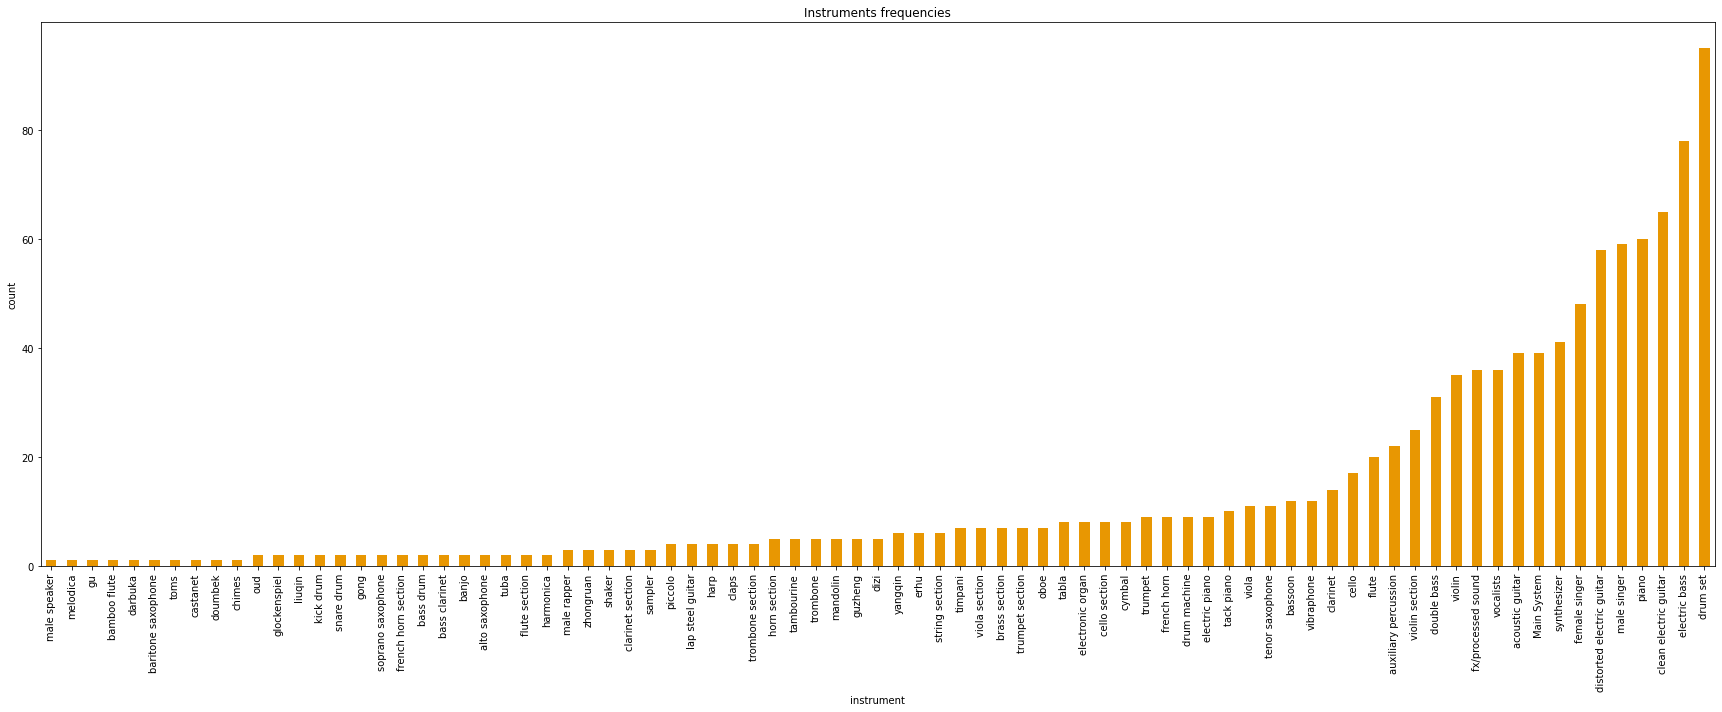

In [ ]:
instruments_df = df_0_to_7.groupby('instrument').size().sort_values()

instruments_plot = instruments_df.plot(kind='bar', colormap='jet', title='Instruments frequencies', color='#e89702', figsize=(30,10))

instruments_plot.set_xlabel("instrument")
instruments_plot.set_ylabel("count")

In [ ]:
instruments_df

instrument
male speaker              1
melodica                  1
gu                        1
bamboo flute              1
darbuka                   1
                         ..
male singer              59
piano                    60
clean electric guitar    65
electric bass            78
drum set                 95
Length: 81, dtype: int64

In [ ]:
instruments = ['drum set', 'piano', 'male singer', 'female singer', 'acoustic guitar', 'double bass', 'violin', 'cello', 'flute', 'clarinet', 'viola']

In [ ]:
df_filtered = df_0_to_7.loc[df['instrument'].isin(instruments)]
df_filtered

,song_name,stem_name,genre,instrument,duration
0,Cayetana_MissThing,Cayetana_MissThing_STEM_01,Rock,drum set,237.029297
4,Cayetana_MissThing,Cayetana_MissThing_STEM_05,Rock,female singer,237.029297
6,Cayetana_MissThing,Cayetana_MissThing_STEM_07,Rock,female singer,237.029297
7,Debussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_01,Classical,male singer,223.526893
8,Debussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_02,Classical,piano,223.526893
...,...,...,...,...,...
1277,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_02,Pop,acoustic guitar,227.643175
1279,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_04,Pop,violin,227.643175
1280,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_05,Pop,piano,227.643175
1282,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_07,Pop,drum set,227.643175


In [ ]:
df_filtered = df_filtered.replace({'instrument': { 'female singer': 'singer', 'male singer': 'singer' }})

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

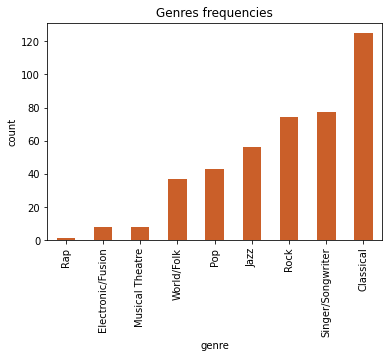

In [ ]:
genre_df = df_filtered.groupby('genre').size().sort_values()

genre_plot = genre_df.plot(kind='bar', colormap='jet', title='Genres frequencies', color='#ca5f29ff')

genre_plot.set_xlabel("genre")
genre_plot.set_ylabel("count")

In [ ]:
genres = ['Classical', 'Singer/Songwriter', 'Rock', 'Jazz', 'Pop', 'World/Folk']

In [ ]:
df_filtered = df_filtered.loc[df['genre'].isin(genres)]
df_filtered

,song_name,stem_name,genre,instrument,duration
0,Cayetana_MissThing,Cayetana_MissThing_STEM_01,Rock,drum set,237.029297
4,Cayetana_MissThing,Cayetana_MissThing_STEM_05,Rock,singer,237.029297
6,Cayetana_MissThing,Cayetana_MissThing_STEM_07,Rock,singer,237.029297
7,Debussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_01,Classical,singer,223.526893
8,Debussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_02,Classical,piano,223.526893
...,...,...,...,...,...
1277,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_02,Pop,acoustic guitar,227.643175
1279,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_04,Pop,violin,227.643175
1280,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_05,Pop,piano,227.643175
1282,TheKitchenettes_Alive,TheKitchenettes_Alive_STEM_07,Pop,drum set,227.643175


In [ ]:
df_classical = df_filtered.loc[df['genre'] == 'Classical']
df_classical.to_csv(index=False)

'song_name,stem_name,genre,instrument,duration\nDebussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_01,Classical,singer,223.5268934240363\nDebussy_LenfantProdigue,Debussy_LenfantProdigue_STEM_02,Classical,piano,223.5268934240363\nJoelHelander_IntheAtticBedroom,JoelHelander_IntheAtticBedroom_STEM_01,Classical,violin,231.79310657596366\nJoelHelander_IntheAtticBedroom,JoelHelander_IntheAtticBedroom_STEM_02,Classical,violin,231.79310657596366\nJoelHelander_IntheAtticBedroom,JoelHelander_IntheAtticBedroom_STEM_03,Classical,viola,231.79310657596366\nJoelHelander_IntheAtticBedroom,JoelHelander_IntheAtticBedroom_STEM_04,Classical,cello,231.79310657596366\nMusicDelta_InTheHalloftheMountainKing,MusicDelta_InTheHalloftheMountainKing_STEM_03,Classical,viola,17.443990929705215\nMusicDelta_InTheHalloftheMountainKing,MusicDelta_InTheHalloftheMountainKing_STEM_04,Classical,cello,17.443990929705215\nMusicDelta_InTheHalloftheMountainKing,MusicDelta_InTheHalloftheMountainKing_STEM_05,Classical,double ba

In [ ]:
df_classical.groupby('instrument').size().sort_values()

instrument
acoustic guitar     1
drum set            1
clarinet            9
viola              11
double bass        13
cello              14
flute              14
singer             14
piano              22
violin             26
dtype: int64

In [ ]:
df_folk = df_filtered.loc[df['genre'] == 'World/Folk']
df_folk.to_csv(index=False)

'song_name,stem_name,genre,instrument,duration\nPhoenix_ElzicsFarewell,Phoenix_ElzicsFarewell_STEM_01,World/Folk,acoustic guitar,175.08281179138322\nPhoenix_ElzicsFarewell,Phoenix_ElzicsFarewell_STEM_03,World/Folk,violin,175.08281179138322\nFallingSparks_Improvisation1,FallingSparks_Improvisation1_STEM_01,World/Folk,double bass,306.2185487528345\nFallingSparks_Improvisation1,FallingSparks_Improvisation1_STEM_02,World/Folk,clarinet,306.2185487528345\nFallingSparks_Improvisation2,FallingSparks_Improvisation2_STEM_01,World/Folk,clarinet,412.16\nFallingSparks_Improvisation2,FallingSparks_Improvisation2_STEM_02,World/Folk,double bass,412.16\nPhoenix_SeanCaughlinsTheScartaglen,Phoenix_SeanCaughlinsTheScartaglen_STEM_01,World/Folk,acoustic guitar,196.11260770975056\nPhoenix_SeanCaughlinsTheScartaglen,Phoenix_SeanCaughlinsTheScartaglen_STEM_03,World/Folk,violin,196.11260770975056\nPhoenix_ColliersDaughter,Phoenix_ColliersDaughter_STEM_01,World/Folk,acoustic guitar,190.65904761904758\nPhoenix_C

In [ ]:
df_folk.groupby('instrument').size().sort_values()

instrument
cello              2
drum set           2
clarinet           3
double bass        3
piano              3
flute              4
singer             5
violin             6
acoustic guitar    9
dtype: int64

In [ ]:
df_jazz = df_filtered.loc[df['genre'] == 'Jazz']
df_jazz.to_csv(index=False)

'song_name,stem_name,genre,instrument,duration\nMusicDelta_LatinJazz,MusicDelta_LatinJazz_STEM_02,Jazz,drum set,66.96580498866213\nMusicDelta_LatinJazz,MusicDelta_LatinJazz_STEM_04,Jazz,flute,66.96580498866213\nSasquatchConnection_Illuminati,SasquatchConnection_Illuminati_STEM_01,Jazz,drum set,344.8320181405896\nSasquatchConnection_Illuminati,SasquatchConnection_Illuminati_STEM_04,Jazz,double bass,344.8320181405896\nSasquatchConnection_Illuminati,SasquatchConnection_Illuminati_STEM_05,Jazz,piano,344.8320181405896\nMusicDelta_FusionJazz,MusicDelta_FusionJazz_STEM_01,Jazz,drum set,110.98562358276644\nMusicDelta_FunkJazz,MusicDelta_FunkJazz_STEM_01,Jazz,drum set,49.38634920634921\nSweat_Anecdoche,Sweat_Anecdoche_STEM_04,Jazz,drum set,126.34113378684809\nSweat_Anecdoche,Sweat_Anecdoche_STEM_06,Jazz,piano,126.34113378684809\nSlowGhost_YoureAMystery,SlowGhost_YoureAMystery_STEM_03,Jazz,drum set,304.2133333333333\nKarachacha_Volamos,Karachacha_Volamos_STEM_01,Jazz,drum set,108.8853514739229\n

In [ ]:
df_jazz.groupby('instrument').size().sort_values()

instrument
acoustic guitar     1
clarinet            1
flute               1
singer              2
piano              13
double bass        14
drum set           24
dtype: int64

In [ ]:
df_pop = df_filtered.loc[df['genre'] == 'Pop']
df_pop.to_csv(index=False)

'song_name,stem_name,genre,instrument,duration\nSecretMountains_HighHorse,SecretMountains_HighHorse_STEM_04,Pop,drum set,355.5004081632653\nSecretMountains_HighHorse,SecretMountains_HighHorse_STEM_07,Pop,piano,355.5004081632653\nSecretMountains_HighHorse,SecretMountains_HighHorse_STEM_09,Pop,singer,355.5004081632653\nDreamersOfTheGhetto_HeavyLove,DreamersOfTheGhetto_HeavyLove_STEM_05,Pop,drum set,294.9863038548753\nDreamersOfTheGhetto_HeavyLove,DreamersOfTheGhetto_HeavyLove_STEM_06,Pop,singer,294.9863038548753\nDreamersOfTheGhetto_HeavyLove,DreamersOfTheGhetto_HeavyLove_STEM_08,Pop,singer,294.9863038548753\nSweetLights_YouLetMeDown,SweetLights_YouLetMeDown_STEM_01,Pop,acoustic guitar,391.9818594104309\nSweetLights_YouLetMeDown,SweetLights_YouLetMeDown_STEM_06,Pop,drum set,391.9818594104309\nSweetLights_YouLetMeDown,SweetLights_YouLetMeDown_STEM_08,Pop,singer,391.9818594104309\nSweetLights_YouLetMeDown,SweetLights_YouLetMeDown_STEM_09,Pop,piano,391.9818594104309\nHeladoNegro_MitadDelMun

In [ ]:
df_pop.groupby('instrument').size().sort_values()

instrument
cello               1
violin              1
acoustic guitar     5
piano               6
drum set           12
singer             18
dtype: int64

In [ ]:
df_rock = df_filtered.loc[df['genre'] == 'Rock']
df_rock.to_csv(index=False)

'song_name,stem_name,genre,instrument,duration\nCayetana_MissThing,Cayetana_MissThing_STEM_01,Rock,drum set,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_05,Rock,singer,237.0292970521542\nCayetana_MissThing,Cayetana_MissThing_STEM_07,Rock,singer,237.0292970521542\nMeaxic_TakeAStep,Meaxic_TakeAStep_STEM_04,Rock,singer,282.7143310657596\nMeaxic_TakeAStep,Meaxic_TakeAStep_STEM_05,Rock,drum set,282.7143310657596\nPlasma_GoodShout,Plasma_GoodShout_STEM_01,Rock,drum set,231.42857142857144\nMusicDelta_Punk,MusicDelta_Punk_STEM_01,Rock,drum set,28.76253968253968\nMusicDelta_Punk,MusicDelta_Punk_STEM_04,Rock,singer,28.76253968253968\nDeadMilkmen_PrisonersCinema,DeadMilkmen_PrisonersCinema_STEM_01,Rock,acoustic guitar,225.8837188208617\nDeadMilkmen_PrisonersCinema,DeadMilkmen_PrisonersCinema_STEM_07,Rock,drum set,225.8837188208617\nDeadMilkmen_PrisonersCinema,DeadMilkmen_PrisonersCinema_STEM_12,Rock,singer,225.8837188208617\nMusicDelta_80sRock,MusicDelta_80sRock_STEM_01,Rock,drum

In [ ]:
df_rock.groupby('instrument').size().sort_values()

instrument
clarinet            1
flute               1
piano               1
violin              1
acoustic guitar     6
drum set           29
singer             35
dtype: int64

In [ ]:
df_singer = df_filtered.loc[df['genre'] == 'Singer/Songwriter']
df_singer.to_csv(index=False)

'song_name,stem_name,genre,instrument,duration\nAimeeNorwich_Child,AimeeNorwich_Child_STEM_01,Singer/Songwriter,drum set,189.269433106576\nAimeeNorwich_Child,AimeeNorwich_Child_STEM_04,Singer/Songwriter,singer,189.269433106576\nAimeeNorwich_Child,AimeeNorwich_Child_STEM_06,Singer/Songwriter,piano,189.269433106576\nAimeeNorwich_Child,AimeeNorwich_Child_STEM_07,Singer/Songwriter,acoustic guitar,189.269433106576\nClaraBerryAndWooldog_Stella,ClaraBerryAndWooldog_Stella_STEM_01,Singer/Songwriter,drum set,195.7419954648526\nClaraBerryAndWooldog_Stella,ClaraBerryAndWooldog_Stella_STEM_05,Singer/Songwriter,piano,195.7419954648526\nClaraBerryAndWooldog_Stella,ClaraBerryAndWooldog_Stella_STEM_07,Singer/Songwriter,singer,195.7419954648526\nAmarLal_SpringDay1,AmarLal_SpringDay1_STEM_01,Singer/Songwriter,acoustic guitar,133.92049886621314\nMutualBenefit_NotForNothing,MutualBenefit_NotForNothing_STEM_01,Singer/Songwriter,singer,180.41904761904763\nMutualBenefit_NotForNothing,MutualBenefit_NotForNoth

In [ ]:
df_singer.groupby('instrument').size().sort_values()

instrument
violin              1
piano              11
acoustic guitar    17
drum set           21
singer             27
dtype: int64

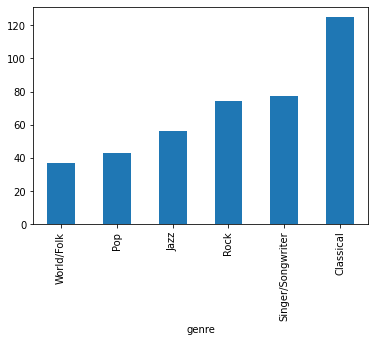

In [ ]:
df_filtered.groupby('genre').size().sort_values().plot.bar()

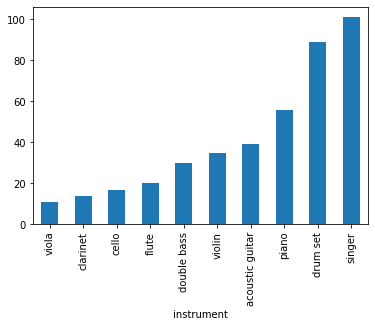

In [ ]:
df_filtered.groupby('instrument').size().sort_values().plot.bar()

In [ ]:
df_filtered.groupby('instrument').size().sort_values()

instrument
viola               11
clarinet            14
cello               17
flute               20
double bass         30
violin              35
acoustic guitar     39
piano               56
drum set            89
singer             101
dtype: int64

##4. Datasets splits

In [ ]:
df_train = pd.read_csv('./drive/My Drive/aps360/final_csv/train.csv')

In [ ]:
df_valid = pd.read_csv('./drive/My Drive/aps360/final_csv/valid.csv')

In [ ]:
df_test = pd.read_csv('./drive/My Drive/aps360/final_csv/test.csv')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

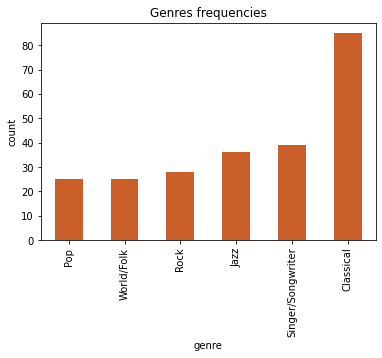

In [ ]:
train_df = df_train.groupby('genre').size().sort_values()

train_genre_plot = train_df.plot(kind='bar', colormap='jet', title='Genres frequencies', color='#ca5f29ff')

train_genre_plot.set_xlabel("genre")
train_genre_plot.set_ylabel("count")


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

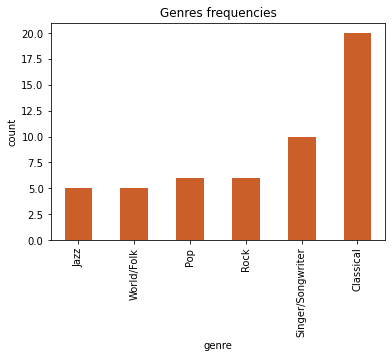

In [ ]:
valid_df = df_valid.groupby('genre').size().sort_values()

valid_genre_plot = valid_df.plot(kind='bar', colormap='jet', title='Genres frequencies', color='#ca5f29ff')

valid_genre_plot.set_xlabel("genre")
valid_genre_plot.set_ylabel("count")

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

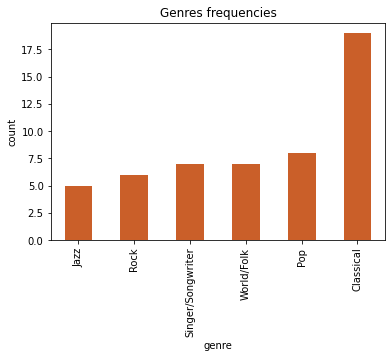

In [ ]:
test_df = df_test.groupby('genre').size().sort_values()

test_genre_plot = test_df.plot(kind='bar', colormap='jet', title='Genres frequencies', color='#ca5f29ff')

test_genre_plot.set_xlabel("genre")
test_genre_plot.set_ylabel("count")

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

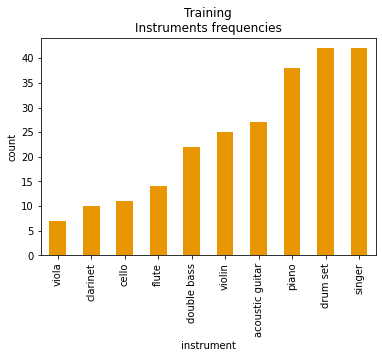

In [ ]:
train_df = df_train.groupby('instrument').size().sort_values()

train_instrument_plot = train_df.plot(kind='bar', colormap='jet', title='Training\nInstruments frequencies', color='#e89702')

train_instrument_plot.set_xlabel("instrument")
train_instrument_plot.set_ylabel("count")

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

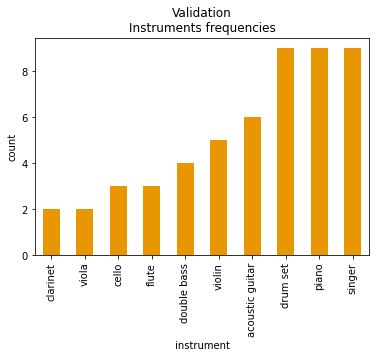

In [ ]:
valid_df = df_valid.groupby('instrument').size().sort_values()

valid_instrument_plot = valid_df.plot(kind='bar', colormap='jet', title='Validation\nInstruments frequencies', color='#e89702')

valid_instrument_plot.set_xlabel("instrument")
valid_instrument_plot.set_ylabel("count")

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'count')

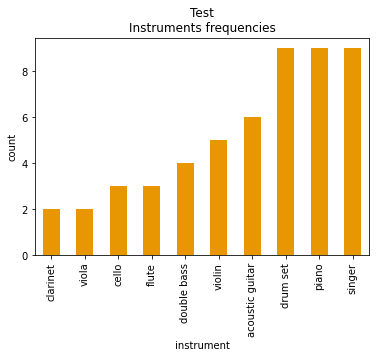

In [ ]:
test_df = df_test.groupby('instrument').size().sort_values()

test_instrument_plot = test_df.plot(kind='bar', colormap='jet', title='Test\nInstruments frequencies', color='#e89702')

test_instrument_plot.set_xlabel("instrument")
test_instrument_plot.set_ylabel("count")

In [ ]:
df_train.groupby('instrument').size().sort_values()

instrument
viola                    7
clarinet                 8
cello                    9
auxiliary percussion    12
flute                   12
double bass             19
violin                  21
acoustic guitar         23
piano                   35
drum set                36
dtype: int64

In [ ]:
df_valid.groupby('instrument').size().sort_values()

instrument
viola                    2
clarinet                 3
cello                    4
flute                    4
auxiliary percussion     5
double bass              6
violin                   7
acoustic guitar          8
piano                   11
drum set                12
dtype: int64

In [ ]:
df_test.groupby('instrument').size().sort_values()

instrument
viola                    2
clarinet                 3
cello                    4
flute                    4
auxiliary percussion     5
double bass              6
violin                   7
acoustic guitar          8
piano                   11
drum set                12
dtype: int64